In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from string import Template
import os
import pandas as pd
from scipy import interpolate
from mpl_toolkits.axes_grid1 import Divider, Size
plt.style.use('fivethirtyeight')

In [3]:
# Hydrogen Long_fuel

file_path = r"C:\Users\halla\OneDrive\Documents\GitHub\property_validation_package\hydrogen_data\HydrogenLong_fuel (1).csv"
headers = ['P', 'T', 'h', 's', 'k', 'mu', 'Cp', 'gam', 'rho', 'R']
data1 = pd.read_csv(file_path, usecols=headers, sep=',')

In [4]:
# Hydrogen Long_mix

file_path = r"C:\Users\halla\OneDrive\Documents\GitHub\property_validation_package\hydrogen_data\HydrogenLong_mix.csv"
headers = ['WAR', 'FAR', 'P', 'T', 'h', 's', 'k', 'mu', 'Cp', 'gam', 'rho', 'R']
data2 = pd.read_csv(file_path, usecols=headers, sep=',')

In [5]:
SYMBOLS = {'P': 'Pressure', 'T': 'Temperature [R]', 'P_val': 'Pressure', 'T_val': 'Temperature [R]',
           'h': 'Enthalpy [BTU/lbm]', 's': 'Entropy [BTU/(lbm*R)]', 'k': 'Conductivity [BTU/(sec*ft*R)]', 
           'mu': 'Viscosity [lbm/(ft*sec)]', 'Cp': 'Specific Heat[BTU/lbm*R]', 'gam': 'Specific Heat Ratio [none]', 
           'rho': 'Density [lbm/ft3]', 'R': 'Gas Constant [BTU/(lbm*R)]', 'h_GASTAB': 'Enthalpy [BTU/lbm] - GASTAB', 
           's_GASTAB': 'Entropy [BTU/(lbm*R)] - GASTAB', 'k_GASTAB': 'Conductivity [BTU/(sec*ft*R)] - GASTAB', 
           'mu_GASTAB': 'Viscosity [lbm/(ft*sec)] - GASTAB', 'Cp_GASTAB': 'Specific Heat[BTU/lbm*R] - GASTAB', 
           'gam_GASTAB': 'Specific Heat Ratio [none] - GASTAB', 'rho_GASTAB': 'Density [lbm/ft3] - GASTAB', 
           'R_GASTAB': 'Gas Constant [BTU/(lbm*R)] - GASTAB', 'h_val_err': 'Enthalpy [BTU/lbm]', 's_val_err': 'Entropy [BTU/(lbm*R)]', 
           'k_val_err': 'Conductivity [BTU/(sec*ft*R)]', 'mu_val_err': 'Viscosity [lbm/(ft*sec)]', 'Cp_val_err': 'Specific Heat[BTU/lbm*R]', 
           'gam_val_err': 'Specific Heat Ratio [none]', 'rho_val_err': 'Density [lbm/ft3]', 'R_val_err': 'Gas Constant [BTU/(lbm*R)]'
           }

C:\Users\halla\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app
C:\Users\halla\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app
C:\Users\halla\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app
C:\Users\halla\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be m

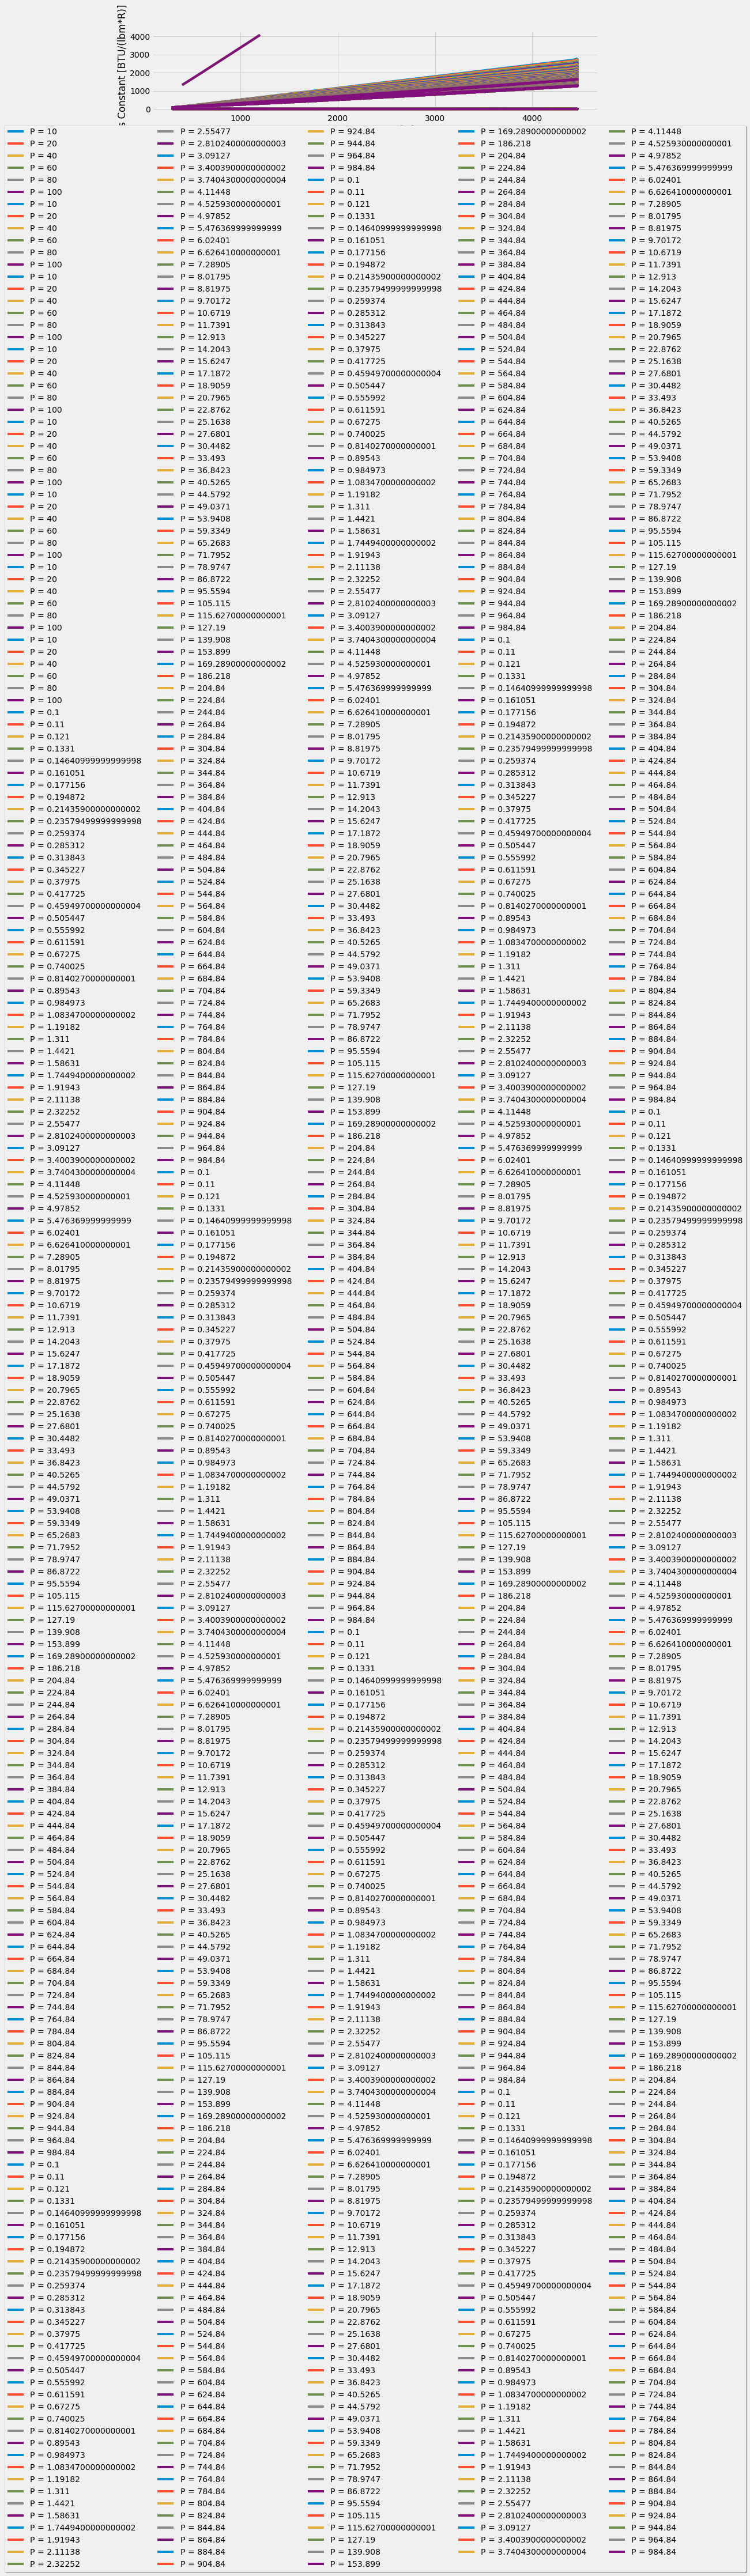

In [25]:

def plot_pressure_lines(data, xdata, ydata, foldername, title = None, xlabel = None, ylabel = None, numberofplots=1):
    path ='C:/Users/halla/OneDrive/Documents/GitHub/property_validation_package/H2_validation_package/'+foldername
    pressure_values = pd.unique(data['P'])
    if numberofplots==1:
        for p in pressure_values:
            mask = data['P'] == p
            df = data[mask]
            ax = plt.subplot(111)
            ax.plot(df[xdata],
                     df[ydata],
                     label = 'P = '+str(p))
        # plt.title(SYMBOLS[ydata[0]]+' vs '+SYMBOLS[xdata[0]])
        plt.xlabel(SYMBOLS[xdata[0]])
        plt.ylabel(SYMBOLS[ydata[0]])
        plt.tight_layout(rect=[0,0,2,2])
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.1,
                         box.width, box.height * 0.9])
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)
        #plt.legend()
        plt.savefig(path+'/'+str(ydata[0]+'vs'+str(xdata[0])), bbox_inches='tight')
        # plt.savefig(path+'/'+str(ydata[0]+'vs'+str(xdata[0])))
    elif numberofplots==2:
        plot1 = plt.subplot(121)
        plot2 = plt.subplot(122)
        for p in pressure_values:
            mask = data['P'] == p
            df = data[mask]
            plot1.plot(df[xdata[0]],
                       df[ydata[0]],
                       label = 'P = '+str(p))
            plot2.plot(df[xdata[0]],
                       df[ydata[1]],
                       label = 'P = '+str(p))
        plot1.set_xlabel(SYMBOLS[xdata[0]])
        plot1.set_ylabel(SYMBOLS[ydata[0]])
        plot2.set_xlabel(SYMBOLS[xdata[1]])
        plot2.set_ylabel(SYMBOLS[ydata[1]])
        plt.tight_layout(rect=[0,0,2,2])
        plt.savefig(path+'/'+str(ydata[0]+'vs'+str(xdata[0])))
        box = plot1.get_position()
        plot1.set_position([box.x0, box.y0 + box.height * 0.1,
                            box.width, box.height * 0.9])
        plot1.legend(loc='upper center', bbox_to_anchor=(1.1, -0.11), fancybox=True, shadow=True, ncol=5)
        box2 = plot2.get_position()
        plot2.set_position([box2.x0, box2.y0 + box2.height * 0.1,
                         box2.width, box2.height * 0.9])

for p in [['h'], ['s'], ['k'], ['mu'], ['Cp'], ['gam'], ['rho'], ['R']]:
    plot_pressure_lines(data1, ['T'], p, foldername='HydrogenLong_fuel')

for p in [['h'], ['s'], ['k'], ['mu'], ['Cp'], ['gam'], ['rho'], ['R']]:
    plot_pressure_lines(data2, ['T'], p, foldername='HydrogenLong_mix')


# plot_pressure_lines(data2, ['T'], ['h'])

# plot_pressure_lines(data3, ['T', 'T'], ['gam', 'gam_GASTAB'], numberofplots=2)

In [10]:
def contour_plot(data, x, y, z):
    path ='C:/Users/halla/OneDrive/Documents/GitHub/property_validation_package/validation_package'
    X = data[x[0]]
    Y = data[y[0]]
    Z = data[z[0]]
    Xlin = np.linspace(X.min(), X.max(), 1000)
    Ylin = np.linspace(Y.min(), Y.max(), 1000)
    Xmesh, Ymesh = np.meshgrid(Xlin, Ylin)
    Z_interp = interpolate.interp2d(X, Y, Z, kind ='linear')
    levels = np.array([0, 0.001, 0.002, 0.003, 0.005, 0.007, 0.01, 0.02, 0.05, 0.1])
    plt.contourf(Xmesh, Ymesh, Z_interp(Xlin, Ylin), colors=['blue', 'cornflowerblue', 'mediumseagreen', 'limegreen', 'greenyellow', 'yellow', 'orange', 'darkorange', 'red'], levels=levels, extend='both')
    plt.colorbar().ax.set_title(z[0])
    plt.tight_layout(rect=[0,0,2,2])
    plt.title('% Error = |(Pkg - CEA) / CEA| * 100')
    plt.xlabel(SYMBOLS[x[0]])
    plt.ylabel(SYMBOLS[y[0]])
    plt.savefig(path+'/'+str(z[0]))
    
# contour_plot(data1, ['T_val'], ['P_val'], ['Cp_val_err'])
